# 230968080
Ishaan Raina\
Week 9\
Question 1


to visualize convert 
TSNE 
2-vec same class together

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print('x_test shape:', x_test.shape)

2025-10-03 14:39:42.603456: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-03 14:39:42.856165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-03 14:39:43.389914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model

# Input placeholder
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856 

2025-10-03 14:41:51.359709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-03 14:41:51.465912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-03 14:41:51.466028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
print("Training the autoencoder...")
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

print("Training complete.")

loss = autoencoder.evaluate(x_test, x_test)
print(f"Test Loss: {loss}")


Training the autoencoder...
Epoch 1/25


2025-10-03 14:43:05.755725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-10-03 14:43:07.118664: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc7087a2490 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-03 14:43:07.118680: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-10-03 14:43:07.140984: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-03 14:43:07.260554: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 [==============================] - 9s 13ms/step - loss: 0.0173 - val_loss: 0.0106
Epoch 2/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 3/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 4/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 5/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 6/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 7/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 8/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 9/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 10/25
391/391 [==============================] - 4s 9ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 11/

313/313 [==============================] - 0s 1ms/step


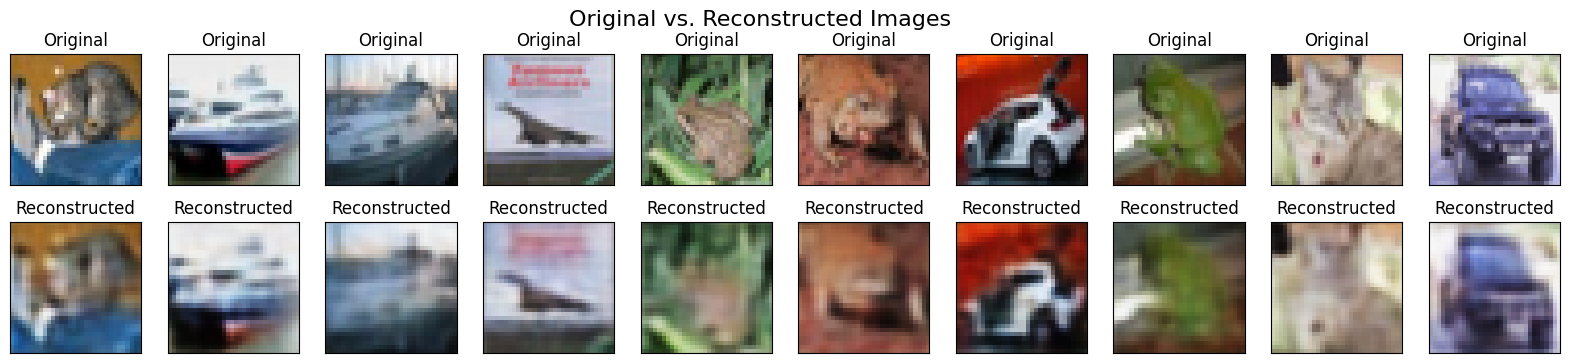

In [5]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle("Original vs. Reconstructed Images", fontsize=16)
plt.show()
